### DPCN Team Baby Sharks Project
- Amey Choudhary
- Aryan Gupta
- Keshav Gupta

In [622]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Implementing EMD 

In [623]:
# reading the dataset
file_path = "../Ahmedabad_Dengue.xlsx"
dataset = pd.read_excel(file_path)

print(dataset.head())
print(dataset.shape)

   Week  Cases  Rainfall
0     1      0       0.0
1     2      4       0.0
2     3      0       0.0
3     4      1       0.0
4     5      2       0.0
(424, 3)


[0.]


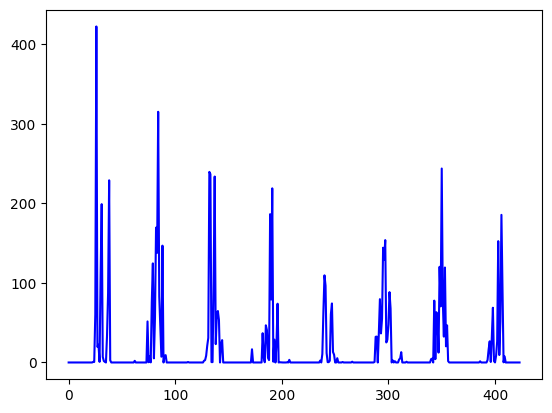

In [624]:
# convert to time series data
time_series_data = dataset.iloc[:, 2:].values
print(time_series_data[0])

plt.plot(time_series_data, color='blue')

In [625]:
cases_series = time_series_data[:, 0]


In [626]:
# library
from PyEMD import EMD

emd = EMD()
IMFs = emd.emd(cases_series)
n_imfs = IMFs.shape[0]


In [627]:
# aryan
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def emd_a(signal, max_imfs=10):
    imfs = []
    # Ensure that residue is of float type
    residue = np.array(signal, dtype=float)
    n = len(signal)

    def is_imf(x):
        n_extrema = np.sum((np.diff(np.sign(np.diff(x))) != 0))
        n_zero_crossings = np.sum(np.diff(np.sign(x)) != 0)
        return np.abs(n_extrema - n_zero_crossings) <= 1
    
    for _ in range(max_imfs):
        h = residue.copy()
        sd = np.inf
        while sd > 0.1 or not is_imf(h):
            # Identify maxima and minima
            max_peaks = np.array([i for i in range(1, n - 1) if h[i] > h[i - 1] and h[i] > h[i + 1]])
            min_peaks = np.array([i for i in range(1, n - 1) if h[i] < h[i - 1] and h[i] < h[i + 1]])
            
            # Interpolate maxima and minima
            if len(max_peaks) < 2 or len(min_peaks) < 2:
                imfs.append(residue)
                return imfs
            max_env = CubicSpline(max_peaks, h[max_peaks], bc_type='natural')(np.arange(n))
            min_env = CubicSpline(min_peaks, h[min_peaks], bc_type='natural')(np.arange(n))
            
            # Mean of envelopes and new component (h)
            mean_env = (max_env + min_env) / 2
            prev_h = h.copy()
            h = h - mean_env
            
            # Calculate standard deviation as a stopping criterion
            # Avoid division by zero by adding a small constant (epsilon)
            epsilon = 1e-10
            sd = np.sum(((prev_h - h) ** 2) / (prev_h ** 2 + epsilon))
        
        imfs.append(h)
        residue -= h
    
    return imfs

# Replace 'dengue_data' with the actual variable containing your data
# Perform EMD on the signal
# cases_series = np.array(time_series_data, dtype=float)
IMFs_aryan= emd_a(cases_series, max_imfs=5)
n_imfs = len(IMFs_aryan)



In [628]:
# plotting the difference between the two methods
diff = []
for i in range(n_imfs):
    temp = []
    for j in range(len(IMFs[i])):
        dif = IMFs[i][j] - IMFs_aryan[i][j]
        dif = np.abs(dif)
        temp.append(dif)
    diff.append(temp)


In [629]:

# def plot_side_by_side(graphs_A, graphs_B, graphs_C):
#     num_graphs = len(graphs_A)
#     fig, axs = plt.subplots(num_graphs, 3, figsize=(15, num_graphs*5))  # Create subplots
    
#     for i in range(num_graphs):
#         axs[i, 0].plot(graphs_A[i])
#         axs[i, 0].set_title(f'IMF {i+1} - Library')
        
#         axs[i, 1].plot(graphs_B[i])
#         axs[i, 1].set_title(f'IMF {i+1} - Aryan')
        
#         axs[i, 2].plot(graphs_C[i])
#         axs[i, 2].set_title(f'IMF {i+1} - Difference')
#     plt.tight_layout()
#     plt.show()

# # Call the function to plot side by side
# plot_side_by_side(IMFs, IMFs_aryan, diff)


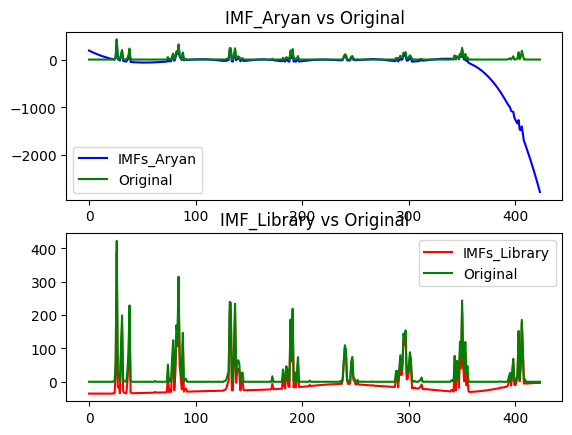

In [630]:
# checking IMFS of the library
value_aryan= []
value_libray = []
for i in range(len(IMFs[0])):
    temp_Aryan = 0
    temp_library = 0
    for j in range(n_imfs):
        temp_Aryan += IMFs_aryan[j][i]
        temp_library += IMFs[j][i]
    value_aryan.append(temp_Aryan)
    value_libray.append(temp_library)

plt.subplot(2, 1, 1)
plt.plot(value_aryan, color='blue')
plt.plot(cases_series, color='green')
plt.title('IMF_Aryan vs Original')
plt.legend(['IMFs_Aryan', 'Original'])
plt.subplot(2, 1, 2)
plt.plot(value_libray, color='red')
plt.plot(cases_series, color='green')
plt.title('IMF_Library vs Original')
plt.legend(['IMFs_Library', 'Original'])
plt.show()

In [631]:
# library seems perfect

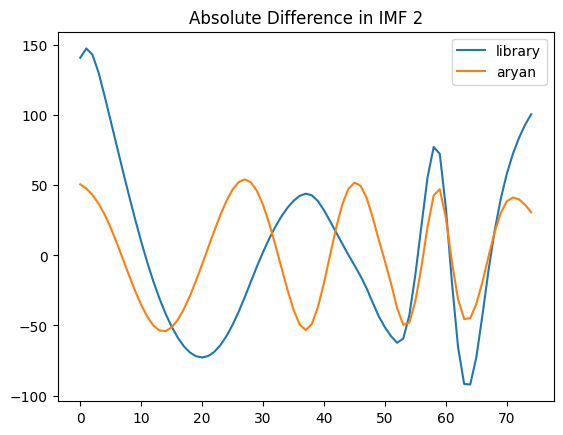

In [632]:
plt.plot(IMFs[2][25:100])
plt.plot(IMFs_aryan[2][25:100])
# plt.plot(diff[1][:100])
plt.legend([ 'library', 'aryan'])
plt.title(f'Absolute Difference in IMF {1+1}')

plt.show()


In [633]:
# not exactly the same but close in between. At the ends, really skewed. 
# Also doubt that we only send time series data of patients/cases and not rainfall.etc

In [634]:
# using pythonn's emd.

print(len(IMFs))
print(len(IMFs[0]))

7
424


In [635]:
case = [ 'short', 'medium', 'long']

p = [9,19,5]
p = np.array(p)

k = np.floor((p+1)/2).astype(int)

In [636]:
# autorgressive model ensemble

import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

class neural_network(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(neural_network, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.linear1(x)
        out = self.sigmoid(out)
        out = self.linear2(out)
        # out = self.sigmoid(out)
        return out

# training the model
def train(imfs, p, k):

    # initialising model
    model = neural_network(input_size=p, hidden_size=k, output_size=1)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # for loop
    epochs = 500 
    for epoch in range(epochs):

        # if epoch % 20 == 0:
            # print(f'Epoch {epoch+1}/{epochs}')    
            
        true_imf = imfs
        initial_imf_input = true_imf
        # print(initial_imf_input.shape)
        initial_imf_input = torch.from_numpy(initial_imf_input).float()
        # print(initial_imf_input.shape)
        # print(initial_imf_input[0])
        total_loss = 0
        y_pred_array = []
        y_true_array = []
        for j in range(p, len(true_imf)):
            y_true = initial_imf_input[j].reshape(1)
            output = model(initial_imf_input[j-p:j])
            y_pred = output

            # total_loss += loss
            # loss.requires_grad = True

            y_pred_array.append(y_pred)
            y_true_array.append(y_true)
    
        loss = criterion(torch.cat(y_pred_array), torch.cat(y_true_array))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(loss)
    return model

forecast_Types = 'long'

if forecast_Types == 'short':
    index = 0   
    test_size = 13
elif forecast_Types == 'medium':
    index = 1
    test_size = 26
else:
    index = 2
    test_size = 52

n = len(cases_series)
train_size = int(n - test_size)

p_cute = p[index]
k_cute = k[index]

models = []

scaler_array = []
for i in range(n_imfs):
    print("Model for IMF ", i+1)
    # use min-max scaling
    t = IMFs[i][0:train_size]
    # t = t.reshape(-1, 1)
    # scaler = MinMaxScaler(feature_range=(-1, 1))
    # t = scaler.fit_transform(t)
    # t = t.reshape(-1)
    # print(type(IMFs[i][0:train_size]))
    # print(IMFs[i][0:train_size].shape)
    # print(type(t))
    # print(t.shape)
    # scaler_array.append(scaler)
    models.append(train(t, p_cute, k_cute))
    # models.append(train(IMFs[i][0:train_size], p_cute, k_cute))


Model for IMF  1
tensor(2764.8184, grad_fn=<MseLossBackward0>)
tensor(2708.6816, grad_fn=<MseLossBackward0>)
tensor(2658.0813, grad_fn=<MseLossBackward0>)
tensor(2614.1763, grad_fn=<MseLossBackward0>)
tensor(2576.5977, grad_fn=<MseLossBackward0>)
tensor(2547.8689, grad_fn=<MseLossBackward0>)
tensor(2524.2581, grad_fn=<MseLossBackward0>)
tensor(2503.7671, grad_fn=<MseLossBackward0>)
tensor(2486.3298, grad_fn=<MseLossBackward0>)
tensor(2471.1833, grad_fn=<MseLossBackward0>)


tensor(2458.0752, grad_fn=<MseLossBackward0>)
tensor(2446.5940, grad_fn=<MseLossBackward0>)
tensor(2436.6257, grad_fn=<MseLossBackward0>)
tensor(2428.1851, grad_fn=<MseLossBackward0>)
tensor(2420.7329, grad_fn=<MseLossBackward0>)
tensor(2414.0774, grad_fn=<MseLossBackward0>)
tensor(2408.1460, grad_fn=<MseLossBackward0>)
tensor(2402.7800, grad_fn=<MseLossBackward0>)
tensor(2397.9236, grad_fn=<MseLossBackward0>)
tensor(2393.2944, grad_fn=<MseLossBackward0>)
tensor(2388.8467, grad_fn=<MseLossBackward0>)
tensor(2384.6323, grad_fn=<MseLossBackward0>)
tensor(2380.5906, grad_fn=<MseLossBackward0>)
tensor(2376.9124, grad_fn=<MseLossBackward0>)
tensor(2373.4326, grad_fn=<MseLossBackward0>)
tensor(2370.1589, grad_fn=<MseLossBackward0>)
tensor(2367.0354, grad_fn=<MseLossBackward0>)
tensor(2364.0471, grad_fn=<MseLossBackward0>)
tensor(2361.1956, grad_fn=<MseLossBackward0>)
tensor(2358.4875, grad_fn=<MseLossBackward0>)
tensor(2355.9617, grad_fn=<MseLossBackward0>)
tensor(2353.6526, grad_fn=<MseLoss

In [637]:
# testing the model
final_test_predictions = []
input_imfs = []

for j in range(n_imfs):
    # scaling 
    t = IMFs[j][train_size-p_cute:train_size]
    # t = IMFs[j][0:p_cute]
    # t = t.reshape(-1, 1)
    # t = scaler_array[j].transform(t)
    # t = t.reshape(-1)
    input_imfs.append(t)

    # input_imfs.append(IMFs[j][train_size-p_cute:train_size])


# for i in range(train_size, n):
for i in range(train_size,n):

    output_preds = []

    for j in range(len(models)):
        model = models[j]
        output = model(torch.tensor(input_imfs[j][-p_cute:]).float())
        output = output.detach().numpy()
        # output = scaler_array[j].inverse_transform(output.reshape(-1, 1))
        output_preds.append(output)
    
    
    for j in range(len(input_imfs)):
        temp = input_imfs[j].tolist()
        # o = scaler_array[j].transform(output_preds[j])
        o = output_preds[j]
        temp.append(float(o))
        input_imfs[j] = np.array(temp)

    final_output = sum(output_preds)
    final_test_predictions.append(final_output)

   

/tmp/ipykernel_329440/3267860408.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  temp.append(float(o))


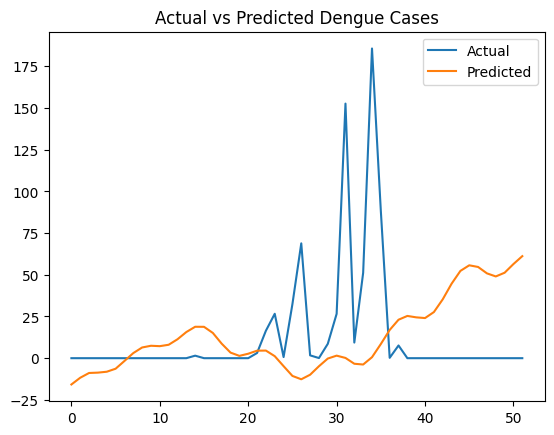

In [638]:
# comparing the with case series

final_test_predictions = np.array(final_test_predictions).reshape(-1)
plt.plot(cases_series[train_size:])
plt.plot(final_test_predictions)
plt.legend(['Actual', 'Predicted'])
plt.title(f'Actual vs Predicted Dengue Cases')
plt.show()


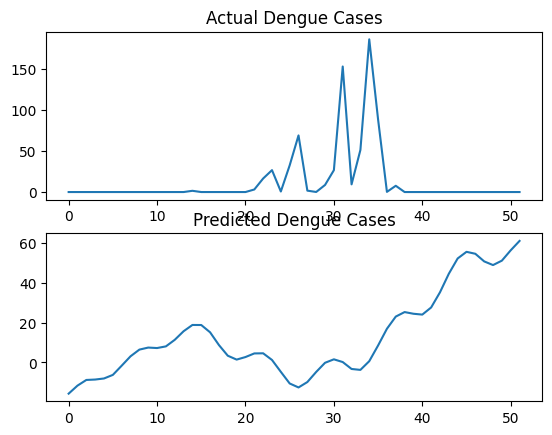

In [639]:
plt.subplot(2, 1, 1)
plt.plot(cases_series[train_size:])
plt.title('Actual Dengue Cases')
plt.subplot(2, 1, 2)
plt.plot(final_test_predictions)
plt.title('Predicted Dengue Cases')
plt.show()


In [641]:
# calcualting the RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(cases_series[train_size:], final_test_predictions))
print(f'RMSE: {rmse}')

RMSE: 45.81799812702501


In [ ]:
# Modular code from here

In [ ]:
# Signal decomposition module